<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 3 - Matteo Esposito</h3></center> 



[Notebook](https://colab.research.google.com/drive/1p4SkPHkEe0IFsvdg1NEXC5i_FloTIeLO) due December 21, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/881881)


#**Choose ANY 2 of the 3 questions for answering.**


In [ ]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

import random

import nltk
nltk.download('punkt')
nltk.download('stopwords')

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

# Qn 1 : Natural Language Processing

**15 points** = $(3 + 4 + 2 + 4 + 2)$                


In this section, you will try to implement functions to obtain the SVD embeddings of words from a text corpus. You will then compare it with Word2Vec.

In [ ]:
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/train.txt"
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/test.txt"

Read lines from text file

In [ ]:
def read_text_and_labels(file_name):
    file = open(file_name)
    lines = file.read().splitlines()
    return [tuple(x.split("\t")) for x in lines]

In [ ]:
train_data = read_text_and_labels('train.txt')
test_data = read_text_and_labels('test.txt')

Tokenization


In [ ]:
from nltk.tokenize import word_tokenize

def tokenize(data):
  return [word_tokenize(item[0].lower()) for item in data]

Classification Labels extraction

In [ ]:
def extract_labels(data):
  return [item[-1] for item in data]

Normalization

In [ ]:
from nltk.corpus import stopwords
import string

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

stopwords_english = stopwords.words('english')

In [ ]:
def normalize(tokens):
  normalized_tokens = []
  for token_list in tokens:
    normalized = [stemmer.stem(word) for word in token_list if word not in stopwords_english and word not in string.punctuation]
    normalized_tokens.append(normalized)
  return normalized_tokens

In [ ]:
train = list(zip(tokenize(train_data),extract_labels(train_data)))
test = list(zip(tokenize(test_data),extract_labels(test_data)))

###(a) Write a function that returns the word-document matrix based on the normalized tokens and any other parameters you would require. Note that each data sample (review) in the dataset can be considered as a document.

In [ ]:
def make_word_doc_matrix(data):
    #YOUR SOLUTION
    return word_doc_matrix

###(b) Write a function that transforms the review dataset into a dense embedding by representing each review with a dense vector extracted from SVD where dimension = 300. 

In [ ]:
def svd_embedding(data):
    #YOUR SOLUTION
    # Call make_word_doc_matrix(data)
    return svd_embedding_data

### (c) Train a Linear SVC model on the dataset using these SVD document embedding representations and report the accuracy on the test-set. 

### Just add code to compute `svd_train_set` and `svd_test_set` by calling relevant functions and data in the cell below. Then run the following cell.

In [ ]:
svd_train_set = # YOUR SOLUTION

svd_test_set = # YOUR SOLUTION

In [ ]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=0, tol=1e-5)

classifier.fit(svd_train_set['X'],svd_train_set['y'])

accuracy = classifier.score(svd_test_set['X'],svd_test_set['y'])

print(accuracy)

The cell below downloads a minimal pretrained word embeddings model from Google News dataset. The model includes embeddings for 100,000 words and phrases. (It will take a while)

In [ ]:
#Uncomment next line if running locally and not on colab
#!pip install gdown

!gdown https://drive.google.com/uc?id=1kaQdlksJ9jcJJ-q5R3UVjFNb02dYHZVs

The model is loaded using gensim:

In [ ]:
import gensim.models

model = gensim.models.KeyedVectors.load_word2vec_format('news-word2vec-100k.bin')

Example of getting the word vector of a word

In [ ]:
# Example of getting the Word2Vec

model.get_vector('happy')

Getting (top) similar words from the model. We see that the figures indicate the 'similarity score' or dot product of different word vectors.

In [ ]:
model.similar_by_word('happy')

### (d) Identify **FOUR interesting pairs of words** which exist both in the vocabulary of the SVD word embeddings and the Word2Vec embeddings that we have here. Compute the similarity score of the pairs of words in each case (in their respective embedding spaces). 

###Reason about which of these two embeddings you would use for a sentiment classification task.

###(e) Identify any 4 reviews **correctly** classified as positive (with respect to sentiment analysis) by the `classifier` in (c) with the SVD *document embeddings* from the `test_data`. In each of these reviews highlight 1 word *in each case* that you think should have lead to a positive prediction. Verify if these 4 words have any similarity relationships as revealed by their SVD *word embedding* representations.    

# Qn 2 : Computer Vision 

**15 points** = $(1.5 + 1 + 1.5 + 1.5 + 1 + 1.5 + 4 + 3)$                

In this section, you will add lines of code to transform a sample image using different filters and see their impact on the prediction by a pretrained image recognition model.



Import of `cv2`  

In [231]:
import cv2
from google.colab.patches import cv2_imshow

Download the image file `cat.jpg`

In [232]:
!wget 'https://i.ibb.co/SB0c2DW/cat.jpg'

--2020-12-12 14:43:21--  https://i.ibb.co/SB0c2DW/cat.jpg
Resolving i.ibb.co (i.ibb.co)... 104.238.221.2, 145.239.131.51, 104.194.8.196, ...
Connecting to i.ibb.co (i.ibb.co)|104.238.221.2|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 304 Not Modified
  Server: openresty
  Date: Sat, 12 Dec 2020 19:43:21 GMT
  Connection: keep-alive
  Last-Modified: Wed, 02 Dec 2020 06:07:28 GMT
  Expires: Thu, 31 Dec 2037 23:55:55 GMT
  Cache-Control: max-age=315360000
  Cache-Control: public
  Access-Control-Allow-Origin: *
  Access-Control-Allow-Methods: GET, OPTIONS
File ‘cat.jpg’ not modified on server. Omitting download.



###(a) Read the RGB image and store it in a variable `raw_image`. Resize `raw_image` to have dimensions `224 x 224` with the same RGB channels and store this in the same variable `image` and **display** it. 

In [233]:
raw_image = cv2.imread("cat.jpg") ## YOUR SOLUTION
image = cv2.resize(raw_image,(224, 224)) ## YOUR SOLUTION

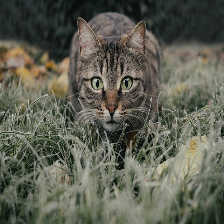

In [234]:
cv2_imshow(image)

###(b) Convert the `image` into a grayscale image, store it in the variable `grayscale` and display it.

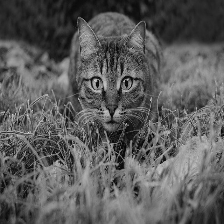

In [235]:
grayscale = cv2.cvtColor(image, code=cv2.COLOR_RGB2GRAY) ## YOUR SOLUTION
cv2_imshow(grayscale)

###(c) Consider the image in RGB and generate three images (`r_inverted`, `g_inverted`, `b_inverted`) where in each one the colors of one channel is inverted. **Display** each of the inverted images.

In [236]:
inverted = cv2.bitwise_not(image)

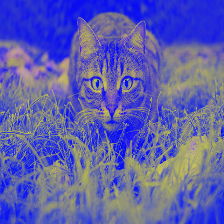

In [237]:
r_inverted = image.copy()
r_inverted[:,:,0] = inverted[:,:,0]
cv2_imshow(r_inverted)

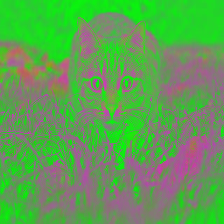

In [238]:
g_inverted = image.copy()
g_inverted[:,:,1] = inverted[:,:,1]
cv2_imshow(g_inverted)

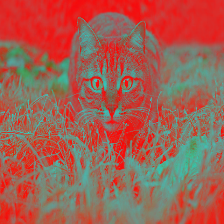

In [239]:
b_inverted = image.copy()
b_inverted[:,:,2] = inverted[:,:,2]
cv2_imshow(b_inverted)

###(d) Implement a filter that makes the image 50% lighter and the filter that makes it 50% darker. Make sure to run the cell below to store the results of applying these filters on `image`. 

###**Display** the resulting images.

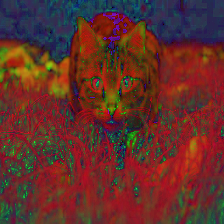

In [288]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
img_hsv.shape
cv2_imshow(img_hsv)

In [286]:
cv2.__version__

'4.4.0'

In [289]:
img_hsv[:, :, 1]

array([[ 29,  34,  38, ...,  51,  52,  48],
       [ 33,  44,  39, ...,  55,  53,  50],
       [ 34,  36,  45, ...,  59,  56,  52],
       ...,
       [ 89,  83,  85, ..., 108,  78,  80],
       [ 89,  69,  73, ..., 119,  74,  75],
       [ 83,  71,  76, ..., 108,  75,  75]], dtype=uint8)

In [351]:
def lightening_filter(img):
    # Make the image 50% lighter
    # YOUR SOLUTION
    lighter_image = np.clip((img + img/2).astype(int), 0, 255)
    return lighter_image
    
def darkening_filter(img): 
    # Make the image 50% darker
    # YOUR SOLUTION
    darker_image = np.clip((img - img/2).astype(int), 0, 255)
    return darker_image

In [352]:
lighter_image = lightening_filter(image)
darker_image = darkening_filter(image)

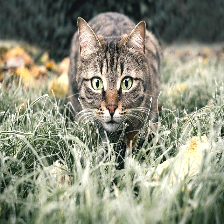

In [353]:
cv2_imshow(lighter_image)

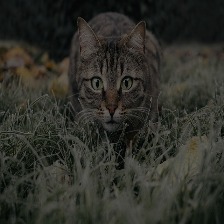

In [354]:
cv2_imshow(darker_image)

### (e) Implement a filter that transforms an image into its mirror image about the lateral axis. Run the following cell to apply this filter on `image` and store it as `mirror_filter`. ###

###Apply this filter to the image and **display** the output by running the next cell.

In [355]:
def mirror_filter(img):
    mirror_image = img.copy()
    mirror_image = cv2.flip(mirror_image, 0)
    return mirror_image  

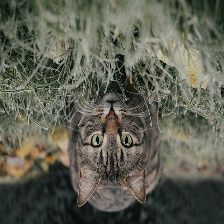

In [356]:
mirror_image = mirror_filter(image)
cv2_imshow(mirror_image)

### (f) Write a function that applies a 3 x  3 mean filter on the image. Mean filter is a simple sliding window that replaces the center pixel value with the average of all pixel values in the window. Note that the border pixels remain unchanged.

### Apply this filter to the image and **display** the output by running the next cell.

In [357]:
def mean_filter(img):
    # Apply 3 x  3 mean filter
    # YOUR SOLUTION
    mean_kernel = np.ones((3,3), np.float32)/9 # as per https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
    mean_filtered_image = cv2.filter2D(img, -1, mean_kernel)
    return mean_filtered_image

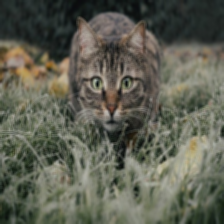

In [358]:
mean_filtered_image = mean_filter(image)
cv2_imshow(mean_filtered_image)

### (g) Here you are going to make predictions for the 9 images you generated in the previous parts. A Convolutional Neural Network model (VGG-16) pretrained on [ImageNet](http://image-net.org/) dataset has been loaded as `model`. The dataset has 1000 common natural image categories for prediction.

### Complete the steps to use these 9 sample images as test set and make predictions of categories.

In [359]:
test_set = [image, grayscale, r_inverted, g_inverted, b_inverted, mirror_image, lighter_image, darker_image, mean_filtered_image]

In [360]:
test_set_names = ['image', 'grayscale', 'r_inverted', 'g_inverted', 'b_inverted', 'mirror_image', 'lighter_image', 'darker_image', 'mean_filtered_image']

In [361]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# Loading the pretrained model with weights from training on ImageNet dataset
model = VGG16(weights='imagenet')

# TODO : [1] Preprocess the test_set images before you can use the model for prediction 
# Hint - preprocess_input()
# YOUR SOLUTION
processed_test_set = []

# Convert grayscale image to a 3 channel image for dimension issues with preprocess_input()
test_set[1] = np.stack((grayscale,)*3, axis=-1)
for img in test_set:
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    processed_test_set.append(preprocess_input(img))

# TODO : [2] Use the model to obtain the probabilities for all output classes
# YOUR SOLUTION
preds = []
for img in processed_test_set:
    preds.append(model.predict(img))

# TODO : [3] Decode the predicted class label with highest probability (top-1) and score to display them
# Hint - Use decode_predictions(___, top=1)[0][0]
# YOUR SOLUTION
labels = []
scores = []
for pred in preds:
    labels.append(decode_predictions(pred, top=1)[0][0][1])
    scores.append(decode_predictions(pred, top=1)[0][0][2])

# TODO : [4] Print this for all 9 samples
# YOUR SOLUTION
for image_sample, label, score in zip(test_set_names, labels, scores):
    print('Predicted class [{}] : {} with {:.02f}% probability'.format(image_sample, label, score*100))

Predicted class [image] : tiger_cat with 47.80% probability
Predicted class [grayscale] : lynx with 63.95% probability
Predicted class [r_inverted] : shower_curtain with 33.79% probability
Predicted class [g_inverted] : matchstick with 16.54% probability
Predicted class [b_inverted] : jellyfish with 77.67% probability
Predicted class [mirror_image] : great_grey_owl with 87.94% probability
Predicted class [lighter_image] : tiger_cat with 60.26% probability
Predicted class [darker_image] : lynx with 72.63% probability
Predicted class [mean_filtered_image] : lynx with 62.38% probability


### (h) Based on the results you obtained in (g), what can you tell about the impact of the different filters that you implemented on the predictability of the image category by the model? Explain with some intuitions and observations.

- Changing the color composition (by inverting colors) yielded wildly inaccurate predictions, this could be due to the fact that by inverting colors we obscure some of the details present in the original image.

- Darkening, Lightening, Mean filtering, grayscaling and preserving the image all yielded roughly the same prediction with varying levels of probability. This could be because most details in the images are preserved and all of these images end up looking very similar. There is very little difference between a Lynx and Tiger cat (purely looking at an image of their faces). 

- Mirroring the image yields a very confident great white owl prediction since the body of the cat when flipped is below the eyes of the cat similar to the positioning of the eyes and body of an owl. We must be careful when using rotations and flips since not all objects are rotation-invariant, such as a cat, or most animals for that matter.

# Qn 3 : Graph ML 

**15 points** = $(1.5 + 1.5 + 1.5 + 2.5 + 2.5 + 2.5 + 3)$                



In this section, you will implement simple functions for obtaining basic graph node embeddings and finally you will observe the differences between them. 

**Please use only simple mathematical operations (numerical and linear algebra from relevant packages). Use of NetworkX or any other specialized graph library wil not be accepted.**

###(a) Write a function `random_adjacency_matrix(n,p)` which returns an adjacency matrix for a "random graph" with $n$ vertices where $p$ is the probability of having an edge between any pair of vertices.


In [322]:
def random_adjacency_matrix(n,p):
    #YOUR SOLUTION
    return A   

###(b) Write a function `transion_matrix(A)` which, given an adjacency matrix $A$, generates a transition matrix $T$ where probability of each edge (u,v) is calculated as $1/degree(u)$.


In [ ]:
def transition_matrix(A):
    #YOUR SOLUTION
    return T

###(c) Write a function `one_hot_embedding(A)` which, given an adjacency matrix A, generates an embedding matrix H where each node is represented with a 1-hot vector.

In [ ]:
def one_hot_embedding(A):
    #YOUR SOLUTION
    return H

###(d) Write a function `random_walk_embedding(A,T,H,w,l)` which, given an adjacency matrix $A$, the corresponding transition matrix $T$, and one-hot encoding matrix $H$, performs [random walks](https://en.wikipedia.org/wiki/Random_walk) on the graph from each node $w$ times with length of the walk equal to $l$ and generate an embedding matrix for each node based on the sum of 1-hot encodings of all nodes that are visited during the walks.


In [ ]:
def random_walk_embedding(A,T, H, w, l):
    #YOUR SOLUTION
    return R

###(e) Write a function `k_hop_embedding(A,H,k)` which, given an adjacency matrix $A$, and one-hot node encoding matrix $H$, generates node embedding matrix $kH$ which represents each node as sum of 1-hot encodings of $k$-hop neighbors. 


In [ ]:
def k_hop_embedding(A, H, k):
    #YOUR SOLUTION
    return kH

A function `most_similar_nodes(Z)` which, given an node embedding matrix, finds the most similar node for each node in the graph.

In [ ]:
def most_similar_nodes(Z):
    # Example : For 5 nodes [1,2,3,4,5], most_similar_node_list could be [5,3,2,1,2] indicating 
    # 1 -> 5, 2 -> 3, 3 -> 2, 4 -> 1, 5 -> 2
    similarity=Z@Z.T
    np.fill_diagonal(similarity,0)
    most_similar_node_list = similarity.argmax(1) 
    return most_similar_node_list

###(f) Generate a random graph where $n=20$, and $p=0.6$, and print the most similar nodes in the graph using the embeddings obtained from :

###(Run the correct functions with the right arguments)

In [ ]:
#@title ⚠️  Random seed : Run this cell mandatorily before running your solution { display-mode: "form" }
# Do not change or remove
np.random.seed(42)
random.seed(42)

In [ ]:
# Generate the random graph 

## YOUR SOLUTION

* `random_walk_embedding(l=4, w=10)`

In [ ]:
## YOUR SOLUTION

* `k_hop_embedding(k=1)`

In [ ]:
## YOUR SOLUTION

* `k_hop_embedding(k=2)`

In [ ]:
## YOUR SOLUTION

###(g) Justify why the most similar nodes obtained in each of the cases in (f) above are different using different node embeddings. Reason intutively about why the obtained 'most similar' nodes are actually similar in each case.  